In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import jieba
import sqlite3

In [262]:
conn = sqlite3.connect('zhihu.db')
cur = conn.cursor()
user_name = cur.execute('select id,name from zhihu').fetchall()
dict_user_name = {}
for i in range(len(user_name)):
    dict_user_name[user_name[i][0]] = user_name[i][1]

In [263]:
corpus = cur.execute('select * from zhihu_dynamic').fetchall()
corpus = pd.DataFrame(corpus,columns=['id','content'])
corpus

,id,content
0,deng-feng-10-87-48,深度学习里面，请问有写train函数的模板吗？
1,deng-feng-10-87-48,Prompt Tuning 相比于 Fine Tuning 在哪些场景下表现更好？
2,deng-feng-10-87-48,CKKS同态加密算法简介
3,deng-feng-10-87-48,全球人工智能教育及研究领导者、DeepLearning.AI创始人
4,deng-feng-10-87-48,吴恩达来信：LLMs的美好未来
...,...,...
8443,hai-feng-31-10,上海普若律师事务所 执业律师
8444,hai-feng-31-10,【强制离婚】老婆提出要和我离婚，我一直不同意，她就离家出走到法院起诉，可我真的不想离，法院会...
8445,hai-feng-31-10,面临离婚危机想保卫家庭？可以这样做！（来自婚姻咨询专家的忠告）
8446,hai-feng-31-10,老婆对我死心了，绝望了，坚决要离婚，我应该怎么挽回她呢


In [264]:
dict_id_content = {}
dict_id_content1 = {}
stop_words = []
with open('stop_words.txt','r',encoding='utf-8') as f:
    for line in f.readlines():
        stop_words.append(line.strip())
print(stop_words)

['U002F', 'U002f', 'u002F', 'u002f', 'u002f', '两个', '新知认证2021', '新知', '新知2022', '偷偷', '有没有', '真的', '话题', '适合', '特别', '发生', '看待', '值得', '公里', '几个', '几天', '几年', '变得', '原因', '只能', '哪些地方', '哪位', '哪家', '哪款', '感到', '感觉', '我要', '我该', '想要', '那种', '就够', '就让', '多久', '发现', '告诉', '女主是', '难以', '4000', '一个月', '一件', '一位', '一句', '一名', '一家', '一年', '一张', '一款', '一步步', '一点', '一生', '一看', '一种', '一篇', '一辈子', '一部', '七年', '万元', '万左右', '万能', '三个', '三年', '不到', '不好', '不想', '不用', '不起眼', '不高', '为啥', '半个', '半年', '十年', '300', '28', '21', '22', '23', '24', '25', '26', '27', '11', '13', '14', '15', '16', '17', '18', '19', '500', '80', '90', '95', '1000', '10', '100', '12', '15', '30', '40', '50', '答主', '优秀答主', '!', '"', '#', '$', '%', '&', '20', '200', '(', ')', '*', '+', ',', '-', '--', '.', '..', '...', '......', '...................', './', '.一', '.数', '.日', '/', '//', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '://', '::', ';', '<', '=', '>', '>>', '?', '@', 'A', 'Lex', '[', '\\', ']', '^', '_', '`', 'e

In [265]:
# 将一个id的所有content 连在一起
for i in range(len(corpus)):
    if corpus['id'][i] not in dict_id_content1:
        dict_id_content1[corpus['id'][i]] = corpus['content'][i]
    else:
        dict_id_content1[corpus['id'][i]] += corpus['content'][i]
    t = [word for word in jieba.cut(corpus['content'][i]) if word not in stop_words]
    print(t)
    # 分词
    corpus['content'][i] = ' '.join([word for word in jieba.cut(corpus['content'][i]) if word not in stop_words])
    if corpus['id'][i] not in dict_id_content:
        dict_id_content[corpus['id'][i]] = corpus['content'][i]
    else:
        dict_id_content[corpus['id'][i]] += corpus['content'][i]
print(dict_id_content)

['深度', '学习', '请问', '写', 'train', '函数', '模板']
['Prompt', ' ', 'Tuning', ' ', '相比', ' ', 'Fine', ' ', 'Tuning', ' ', '场景', '表现', '更好']
['CKKS', '同态', '加密算法', '简介']
['全球', '人工智能', '教育', '研究', '领导者', 'DeepLearning', 'AI', '创始人']
['吴恩达', '来信', 'LLMs', '美好未来']
['机器', '学习', '研究', '指南', 'From', ' ', 'John', ' ', 'Schulman']
['必读', ' ', 'LLM', ' ', '开发', '全栈', '指南']
['Self', 'Attention', ' ', ' ', 'Transformer', '指南', 'Transformer', '创作者', '思考']
['163', 'u002F326', 'u002F2', '等式']
['OI', '中', '成功', '题', '一道']
['任意', '选择', '超能力', '猜到', '死亡', '选择', '超能力']
['评价', ' ', 'ICPC', ' ', 'World', ' ', 'Final', ' ', '2022']
['不杀', '吴家', '十七口', '完']
['科研', '优秀']
['SCI', '原神', 'SCI', '论文', '插图', '遇见', '原神稻', '妻城']
['比利时', '荷语', '鲁汶', '大学', 'KU', ' ', 'Leuven', '编程语言', 'PL', '方向', 'PhD', '招生']
['憨憨的', '情侣', '头像']
['2021', '年', '拜年', '表情', '包']
['社恐', '碰到', '病娇会']
['感恩', '资助', '奋力', '前行']
['大学生', '职业', '生涯规划', '最新', '范文']
['助学金', '申请书', '1500', '字']
['2021', '年', '第二季度', '月', '思想汇报']
['介绍', '机器人', '研究', '机构',

In [266]:
data = pd.DataFrame(dict_id_content,index=[0]).T
data.columns = ['content']
# data 加入name
data['name'] = data.index.map(dict_user_name)
data1 = pd.DataFrame(dict_id_content1,index=[0]).T
data1.columns = ['content']
# data1 加入name
data1['name'] = data1.index.map(dict_user_name)

In [267]:
tfidf = TfidfVectorizer(min_df=20)
tfidf_matrix = tfidf.fit_transform(data['content'])
print(tfidf_matrix.shape)
print(tfidf_matrix)

(1511, 79)
  (0, 35)	0.6908826706796442
  (0, 40)	0.3243107068102489
  (0, 70)	0.322091313538665
  (0, 20)	0.5601436302822129
  (1, 16)	0.4438146630731531
  (1, 74)	0.8961185997630358
  (2, 63)	1.0
  (3, 21)	0.7171375495145204
  (3, 25)	0.696931657392824
  (4, 32)	0.4836206272210221
  (4, 36)	0.40499639354087513
  (4, 4)	0.5396994311489806
  (4, 62)	0.5575065328430662
  (5, 66)	0.5936954151704946
  (5, 31)	0.5897386667167828
  (5, 32)	0.5474797338574691
  (10, 77)	0.5921593217632555
  (10, 43)	0.5869387411380196
  (10, 70)	0.5521324585642454
  (11, 69)	0.7013004330340143
  (11, 22)	0.7128658377466998
  (12, 59)	0.5257448599259075
  (12, 33)	0.4935850741680791
  (12, 78)	0.4748483392903562
  (12, 4)	0.5044652331857674
  :	:
  (1492, 22)	1.0
  (1493, 25)	0.647761453412255
  (1493, 63)	0.761843224996615
  (1494, 18)	1.0
  (1495, 42)	1.0
  (1497, 8)	0.7174648648947916
  (1497, 33)	0.6965946939515824
  (1498, 11)	0.5425725156982439
  (1498, 72)	0.47799163177390536
  (1498, 23)	0.44381163842

In [268]:
# 打印关键词
tfidf.get_feature_names_out()
print(tfidf.get_feature_names_out())

['2022' '专业' '世界' '中国' '事情' '人生' '优秀' '体验' '信息' '公司' '分享' '分析' '发展' '品牌'
 '喜欢' '城市' '大学' '女朋友' '女生' '好看' '学习' '学生' '孩子' '官方' '小说' '工作' '帐号' '建议'
 '微信' '思维' '情况' '情商' '手机' '技巧' '技术' '指南' '推荐' '提升' '搞笑' '攻略' '教育' '方法'
 '有限公司' '淘宝' '游戏' '父母' '生活' '电影' '男朋友' '男生' '疫情' '瞬间' '知乎' '知识' '社死' '科技'
 '管理' '系列' '经验' '美国' '老师' '考研' '考试' '职业' '肚子疼' '英语' '行业' '视频' '设计' '评价'
 '请问' '读书' '资格证' '赚钱' '选择' '选购' '陌生人' '高中' '高考']


In [269]:
# 打印每个content 及其分割提取后的关键词
for i in range(len(data)):
    print(data['content'][i])
    print(tfidf.get_feature_names_out()[tfidf_matrix[i].toarray().argsort()[0][-1:-11:-1]])

深度 学习 请问 写 train 函数 模板Prompt   Tuning   相比   Fine   Tuning   场景 表现 更好CKKS 同态 加密算法 简介全球 人工智能 教育 研究 领导者 DeepLearning AI 创始人吴恩达 来信 LLMs 美好未来机器 学习 研究 指南 From   John   Schulman必读   LLM   开发 全栈 指南Self Attention     Transformer 指南 Transformer 创作者 思考
['指南' '学习' '教育' '请问' '建议' '学生' '孩子' '官方' '小说' '工作']
163 u002F326 u002F2 等式OI 中 成功 题 一道任意 选择 超能力 猜到 死亡 选择 超能力评价   ICPC   World   Final   2022不杀 吴家 十七口 完科研 优秀SCI 原神 SCI 论文 插图 遇见 原神稻 妻城比利时 荷语 鲁汶 大学 KU   Leuven 编程语言 PL 方向 PhD 招生
['选择' '大学' '高考' '微信' '学生' '孩子' '官方' '小说' '工作' '帐号']
憨憨的 情侣 头像2021 年 拜年 表情 包社恐 碰到 病娇会感恩 资助 奋力 前行大学生 职业 生涯规划 最新 范文助学金 申请书 1500 字2021 年 第二季度 月 思想汇报
['职业' '高考' '好看' '学生' '孩子' '官方' '小说' '工作' '帐号' '建议']
介绍 机器人 研究 机构 公司机械 臂 运动 控制算法 轨迹 规划 算法 动力学 算法 工程师 35 岁 岁 危机学习 完   c++ primer   找 工作 多远南京 邮电大学 学生 2020 申请 加州 理工 EE 系 唯一 大陆 PhD朋友圈 东西 发研     干嘛 建议科研     优秀听 导师 最有 水平 话
['学生' '工作' '高考' '微信' '孩子' '官方' '小说' '帐号' '建议' '思维']
全国 计算机 二级 考试 office甜到 骨子里 情话情侣 间 做 事情「 我爱你 高级 表达长期 流量 卡 推荐 汇总 全网 39 元 高性价比 手机 流量 卡 套餐 2023 谱 流量 卡
['考试' '事情' '手机' '推荐' 

In [270]:
# 计算两个句子的相似度
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix[0:1],tfidf_matrix).flatten()
cosine_similarities

array([1., 0., 0., ..., 0., 0., 0.])

In [271]:
# 打印相似度最高的句子
related_docs_indices = cosine_similarities.argsort()[:-4:-1]
for i in related_docs_indices:
    print(i)
    print(data1['content'][i])

0
深度学习里面，请问有写train函数的模板吗？Prompt Tuning 相比于 Fine Tuning 在哪些场景下表现更好？CKKS同态加密算法简介全球人工智能教育及研究领导者、DeepLearning.AI创始人吴恩达来信：LLMs的美好未来机器学习研究指南（From John Schulman）[必读] LLM 应用开发全栈指南Self-Attention & Transformer完全指南：像Transformer的创作者一样思考
595
2020春节笔记-治愈系英语优秀答主美剧话题下的优秀答主拳拳到肉的R级动作爽片，可惜不能上映？2023癸卯年阳宅家居风水指南（全）
210
新笔记本到手如何验机，新机又该做哪些工作？网络购机验货指南（简单向）


In [272]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(tfidf_matrix,tfidf_matrix)
cosine_similarities

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.44381466],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.44381466, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [273]:
# Do cluster analysis on name
from sklearn.cluster import KMeans

In [274]:
# 用kmeans聚类
dict_kmeans = {}
best_k = 1e9
best_kmeans = None
# i = 10
# while i <= 130:
#     kmeans = KMeans(n_clusters=i,random_state=0).fit(tfidf_matrix)
#     dict_kmeans[i] = kmeans.inertia_
#     if kmeans.inertia_ < best_k:
#         best_k = kmeans.inertia_
#         best_kmeans = kmeans
#     i += 10

print(dict_kmeans)

{}


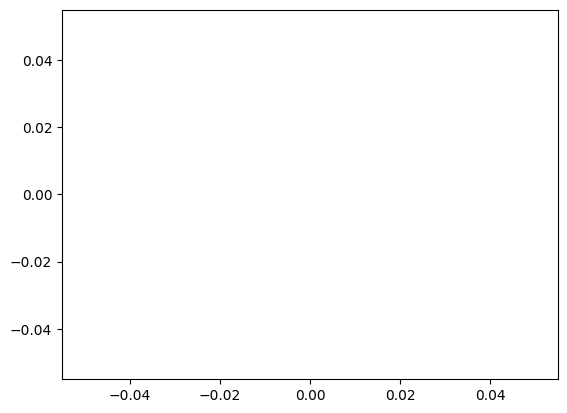

In [275]:
import matplotlib.pyplot as plt
plt.plot(list(dict_kmeans.keys()),list(dict_kmeans.values()))

In [276]:
best_kmeans = KMeans(n_clusters=65,random_state=0).fit(tfidf_matrix)

In [277]:
# Visual display
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [278]:
tsne = TSNE(n_components=2,random_state=0,init='random',perplexity=20)
X_tsne = tsne.fit_transform(tfidf_matrix)

F:\Program\AI\miniconda\envs\Py_hw\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


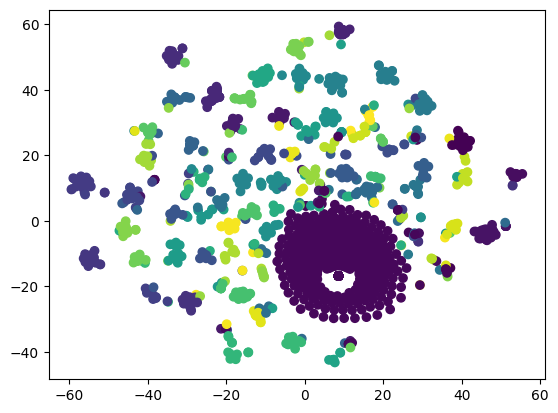

In [279]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=best_kmeans.labels_)